In [65]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df= pd.read_excel("Base_Final.xlsx")
df

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,...,ATTR2,ATTR3,CATEGORY_ID,CATEGORY_y,SEGMENT,YEAR,MONTH,WEEK_NUMBER,DATE,YEAR_MONTH
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058792778BP1,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058757630,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,PRETREAT,2023,7,26,2023-07-03,2023-07
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058753441,VANISH PODER O2 DOYPACK 120 GR 7501058753441,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7702626204208BP1,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07


In [55]:
mask = df["BRAND"].astype(str).str.strip().str.upper() == "VANISH"
df_vanish = df.loc[mask].copy()
df_vanish

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,...,ATTR3,CATEGORY_ID,CATEGORY_y,SEGMENT,YEAR,MONTH,WEEK_NUMBER,DATE,YEAR_MONTH,cluster
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058792778BP1,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07,0
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058757630,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,...,ROSA,1,FABRIC TREATMENT AND SANIT,PRETREAT,2023,7,26,2023-07-03,2023-07,0
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058753441,VANISH PODER O2 DOYPACK 120 GR 7501058753441,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07,0
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7702626204208BP1,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,...,ROSA,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07,0


In [77]:
df_importantes = df_vanish.loc[:,["TOTAL_UNIT_SALES","TOTAL_VALUE_SALES","TOTAL_UNIT_AVG_WEEKLY_SALES","REGION"]]
scaler= StandardScaler()
df_importantes= pd.get_dummies(df_importantes, columns=["REGION"], drop_first=True)
X_scaled = scaler.fit_transform(df_importantes)
X_scaled


array([[-0.37078632, -0.53507203, -0.69694608, ...,  2.49411521,
        -0.40064768, -0.44843285],
       [-0.27903974,  0.2813798 , -0.43754861, ...,  2.49411521,
        -0.40064768, -0.44843285],
       [-0.10660958, -0.05582224, -0.13225566, ...,  2.49411521,
        -0.40064768, -0.44843285],
       ...,
       [ 3.06389282,  2.47558532,  0.39994238, ..., -0.40094379,
        -0.40064768,  2.2299883 ],
       [ 3.66262985,  0.93912232,  2.16942302, ..., -0.40094379,
        -0.40064768,  2.2299883 ],
       [-0.09192249,  1.58241312, -0.55235501, ..., -0.40094379,
        -0.40064768,  2.2299883 ]])

In [97]:
k_values = list(range(2, 9))

# ------------------------------------------------------------
# 2) K-MEANS SIN TRANSFORMAR (datos originales)
# ------------------------------------------------------------
inertias = []
sil_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))


In [98]:
k_arr = np.array(k_values, dtype=float)
y_arr = np.array(inertias, dtype=float)
x1, y1 = k_arr[0], y_arr[0]
x2, y2 = k_arr[-1], y_arr[-1]
den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
dist = np.abs((y2 - y1)*k_arr - (x2 - x1)*y_arr + x2*y1 - y2*x1) / (den if den != 0 else 1.0)
k_elbow = int(k_arr[np.argmax(dist)])

In [99]:
# 5) K-Means con k óptimo
kmeans_opt = KMeans(n_clusters=k_elbow, random_state=42, n_init=10)
labels_opt = kmeans_opt.fit_predict(X_scaled)

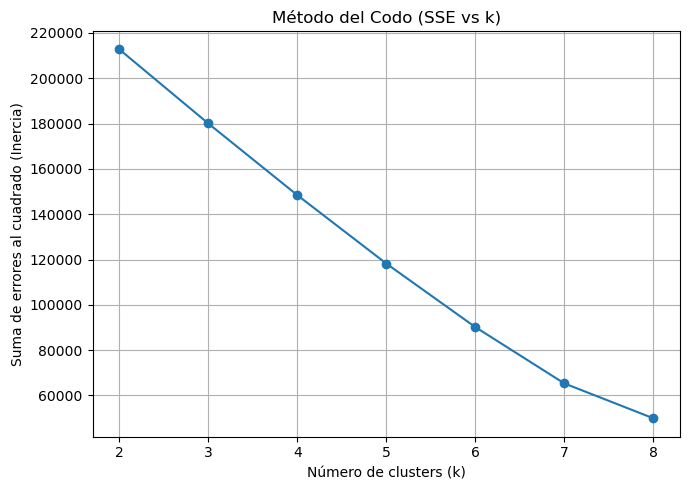

In [125]:
plt.figure(figsize=(7,5))
plt.plot(k_values, inertias, marker='o')
plt.title("Método del Codo (SSE vs k)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de errores al cuadrado (Inercia)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [129]:
df_clusters = df_vanish.copy()
df_clusters["CLUSTER_OPT"] = labels_opt
df_clusters

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,...,CATEGORY_ID,CATEGORY_y,SEGMENT,YEAR,MONTH,WEEK_NUMBER,DATE,YEAR_MONTH,cluster,CLUSTER_OPT
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0,5
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0,5
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0,5
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0,5
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2022,8,34,2022-08-28,2022-08,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058792778BP1,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07,0,3
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058757630,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,...,1,FABRIC TREATMENT AND SANIT,PRETREAT,2023,7,26,2023-07-03,2023-07,0,3
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7501058753441,VANISH PODER O2 DOYPACK 120 GR 7501058753441,...,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07,0,3
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,7702626204208BP1,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,...,1,FABRIC TREATMENT AND SANIT,POWDER,2023,7,26,2023-07-03,2023-07,0,3


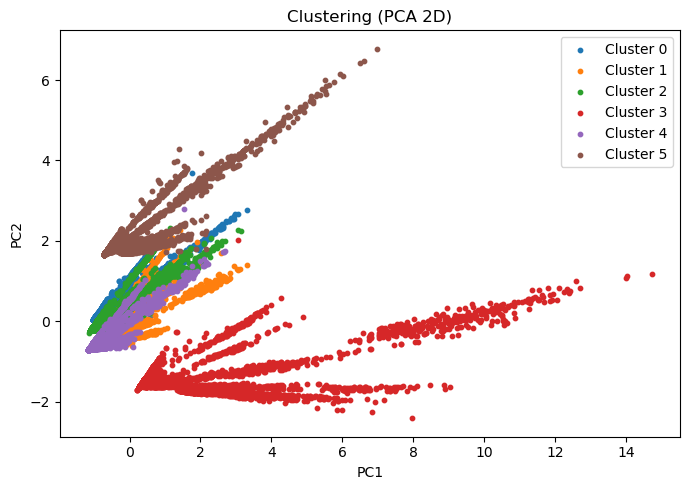

In [111]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
for c in sorted(np.unique(labels_opt)):
    pts = X_2d[labels_opt == c]
    plt.scatter(pts[:,0], pts[:,1], s=10, label=f"Cluster {c}")
plt.title("Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

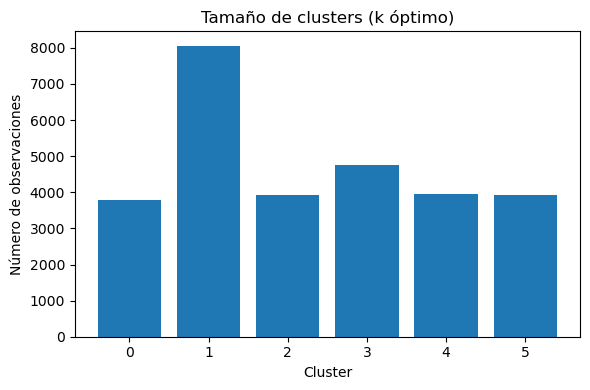

In [113]:
# 7.3 Barras: tamaño de clúster
unique, counts = np.unique(labels_opt, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(unique.astype(str), counts)
plt.title("Tamaño de clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de observaciones")
plt.tight_layout()
plt.show()

C:\Users\alfre\AppData\Local\Temp\ipykernel_46756\2502042146.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in sorted(np.unique(labels))], showmeans=True)


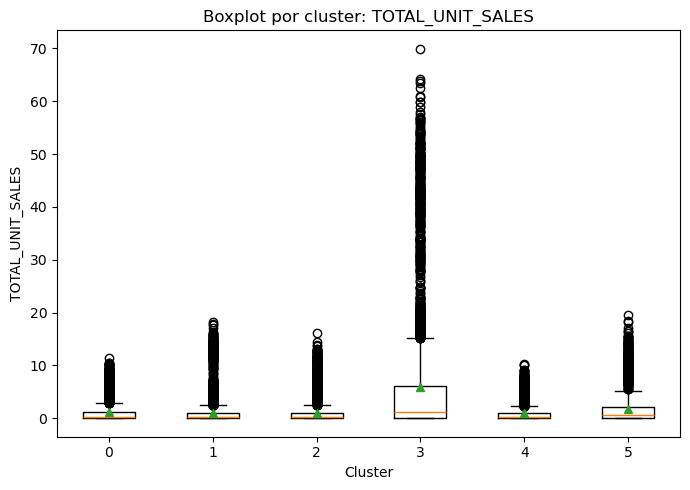

C:\Users\alfre\AppData\Local\Temp\ipykernel_46756\2502042146.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in sorted(np.unique(labels))], showmeans=True)


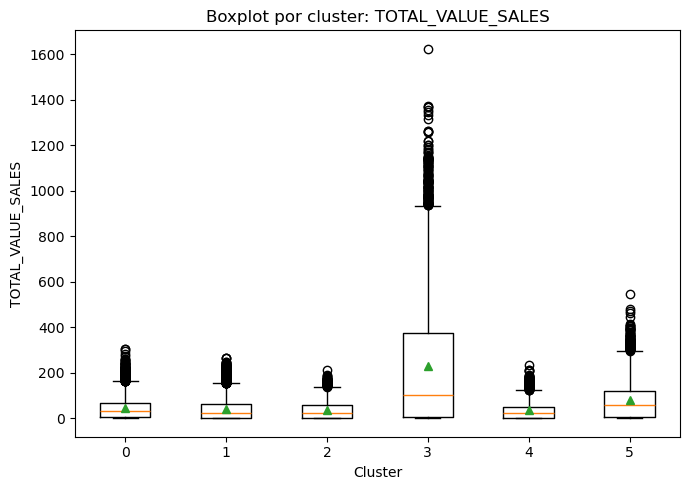

C:\Users\alfre\AppData\Local\Temp\ipykernel_46756\2502042146.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in sorted(np.unique(labels))], showmeans=True)


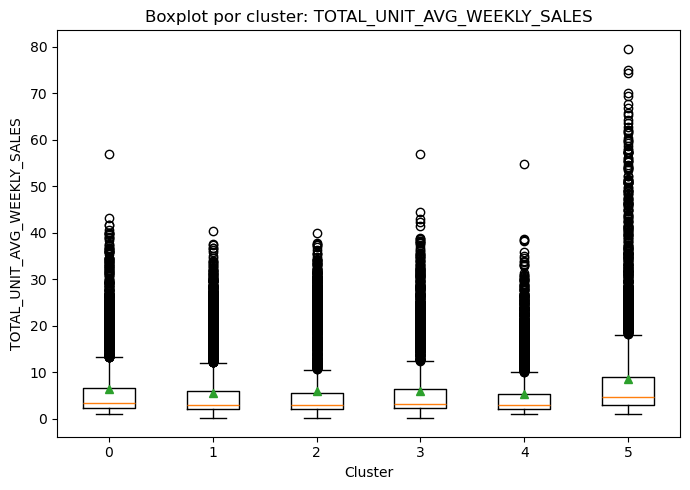

In [123]:
# 7.4 Boxplots por variable numérica vs clúster
def boxplot_by_cluster(values, labels, title, ylabel):
    data = [values[labels == c] for c in sorted(np.unique(labels))]
    plt.figure(figsize=(7,5))
    plt.boxplot(data, labels=[str(c) for c in sorted(np.unique(labels))], showmeans=True)
    plt.title(title)
    plt.xlabel("Cluster")
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
boxplot_by_cluster(df_vanish["TOTAL_UNIT_SALES"].values, labels_opt,
                   "Boxplot por cluster: TOTAL_UNIT_SALES", "TOTAL_UNIT_SALES")
boxplot_by_cluster(df_vanish["TOTAL_VALUE_SALES"].values, labels_opt,
                   "Boxplot por cluster: TOTAL_VALUE_SALES", "TOTAL_VALUE_SALES")
boxplot_by_cluster(df_vanish["TOTAL_UNIT_AVG_WEEKLY_SALES"].values, labels_opt,
                   "Boxplot por cluster: TOTAL_UNIT_AVG_WEEKLY_SALES", "TOTAL_UNIT_AVG_WEEKLY_SALES")
